In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


Cross Val Scores: [0.91507463 0.91094527 0.91502488 0.90965174 0.91024876]

KNN Model Evaluation:
Precision: 0.5042595069209784, Recall: 0.5004865194000614, F-score: 0.48575296588739786, Accuracy: 0.9131717171717172
Cross Val Scores: [0.91855721 0.91855721 0.91855721 0.91855721 0.91850746]

Logistic Regression Model Evaluation:
Precision: 0.4600707070707071, Recall: 0.5, F-score: 0.4792050248824266, Accuracy: 0.9201414141414141


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross Val Scores: [0.91855721 0.91855721 0.91855721 0.91855721 0.91850746]

Decision Tree Model Evaluation:
Precision: 0.4600707070707071, Recall: 0.5, F-score: 0.4792050248824266, Accuracy: 0.9201414141414141


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross Val Scores: [0.91855721 0.91855721 0.91855721 0.91855721 0.91850746]

Random Forest Model Evaluation:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.4600707070707071, Recall: 0.5, F-score: 0.4792050248824266, Accuracy: 0.9201414141414141
Cross Val Scores: [0.91855721 0.91855721 0.91855721 0.91855721 0.91850746]

Gradient Boosting Model Evaluation:
Precision: 0.4600707070707071, Recall: 0.5, F-score: 0.4792050248824266, Accuracy: 0.9201414141414141


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


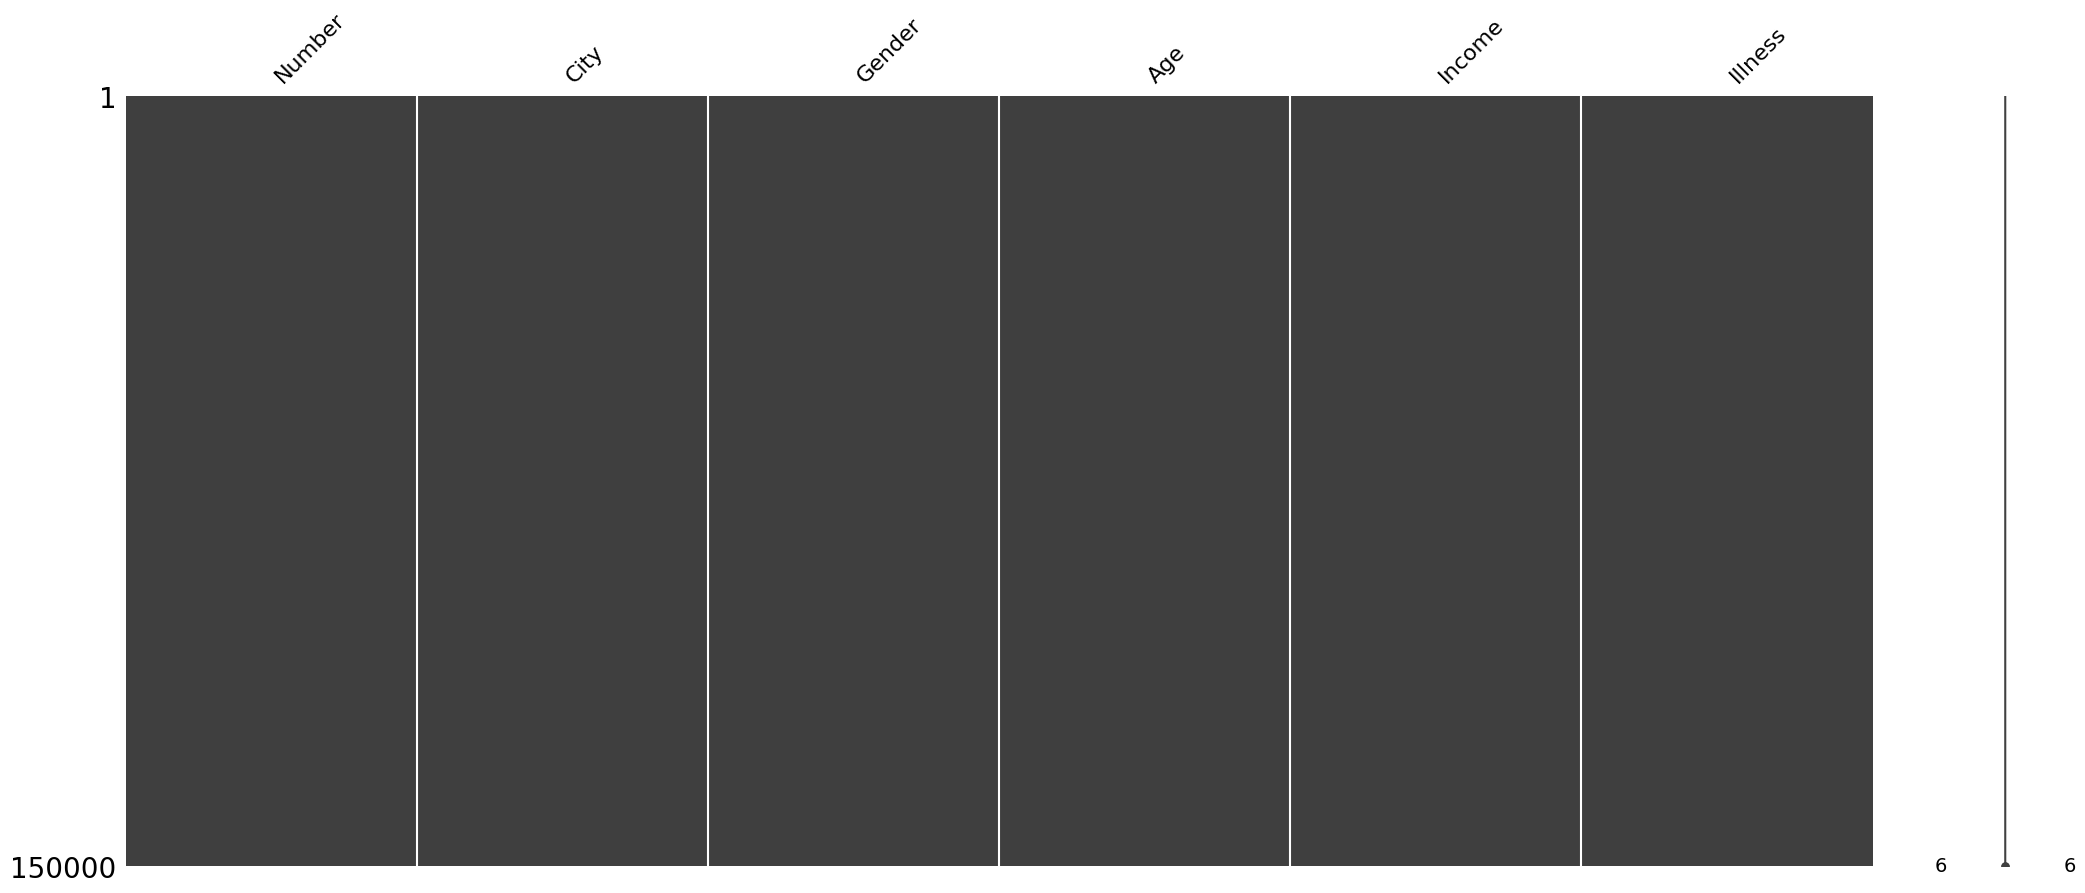

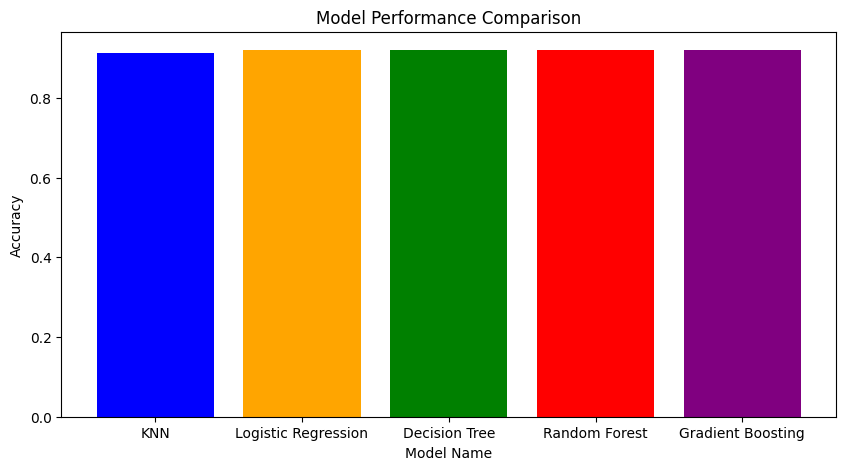

In [ ]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

# [ Previous function definitions remain the same ]
def load_and_process_data(file_path):
    data = pd.read_csv(file_path)
    mappings = {
        'Gender': {'Male':0, 'Female':1},
        'City': {'Dallas':0, 'New York City':1, 'Los Angeles':2, 'Mountain View':3,'Boston':4,
                 'Washington D.C.':5, 'San Diego':6, 'Austin':7},
        'Illness': {'No':0, 'Yes':1}
    }
    for col, mapping in mappings.items():
        data[col] = data[col].map(mapping)
    return data

def visualize_missing_data(data):
    msno.matrix(data)

def train_evaluate_model(model, model_name, X_train, y_train, X_test, y_test, results):
    model = train_model(model, X_train, y_train)
    print(f"\n{model_name} Model Evaluation:")
    evaluate_model(model, X_test, y_test)

    # Storing results for comparison
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

def compare_model_performance(results):
    names = list(results.keys())
    values = list(results.values())

    plt.figure(figsize=(10, 5))
    plt.bar(names, values, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.xlabel('Model Name')
    plt.ylabel('Accuracy')
    plt.title('Model Performance Comparison')
    plt.show()

    # To use in Tableau: Save the results as a .csv file
    pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).to_csv('model_performance.csv', index=False)

def main():
    # [ Previous code in main function remains the same ]
    FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/Zobaed/simple_classification_or_regression.csv'  # Update your file path

    # Load and Process Data
    data = load_and_process_data(FILE_PATH)

    # Visualize Missing Data
    visualize_missing_data(data)

    # Prepare Train-Test Data
    features = data.iloc[:,1:4]
    target = data['Illness']
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

    models = {
        'KNN': KNeighborsClassifier(n_neighbors=2),
        'Logistic Regression': LogisticRegression(random_state=0),
        'Decision Tree': DecisionTreeClassifier(random_state=0),
        'Random Forest': RandomForestClassifier(random_state=0),
        'Gradient Boosting': GradientBoostingClassifier(random_state=0)
    }

    results = {}

    for model_name, model_instance in models.items():
        train_evaluate_model(model_instance, model_name, X_train, y_train, X_test, y_test, results)

    compare_model_performance(results)

if __name__ == "__main__":
    main()
